# Homework


The homework is to prepare a report for the Ministry of Transport, revealing the nature and characteristics of flight delays. The report should help identify problem areas and contribute to decision-making. Therefore, strive not to state general facts, but to show problems. For example, the fact "the average departure delay is 15 minutes" by itself says little and does not help to understand why this is happening. On the contrary, a graph showing that on Mondays delays increase threefold compared to other days against the background of an increase in the number of flights and passengers suggests a possible cause of the problem: airports cannot cope with uneven load.

The report should be in the form of a notebook with a clear structure. At the beginning of the Markdown cell there is a brief description of the question under study (what we will study), then the code and all its outputs (tables, graphs, values), then again in the Markdown cell in which your brief conclusion is formulated.

The report should contain at least **5 results** confirmed by graphs. For variety of material, use different types of diagrams. All graphs should be provided with the necessary signatures (axis designations, title, color scheme legend).

To solve the problems, use the methods of the `pandas` library.

Задержки рейсов — критическая проблема современной авиации, приводящая к финансовым потерям, недовольству пассажиров и перегрузке инфраструктуры. Данный анализ направлен на: 
* Выявление ключевых причин задержек (погода, каскадные опоздания, ошибки авиакомпаний).
* Определение наиболее проблемных аэропортов и авиакомпаний.
* Возможные решения для уменьшения времени задержек или их количества.
  
Мы будем использовать следующие данные:
* Рейсы: 5.8 млн записей (время вылета/прилета, задержки, причины).
* Аэропорты: 337 объектов с координатами и характеристиками.
* Авиакомпании: 14 перевозчиков, включая American Airlines, Delta, Southwest.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
flights = pd.read_csv('flights.csv', sep = ',', low_memory=False)
flights_mask = df[['DEPARTURE_TIME', 'ARRIVAL_TIME']].isna().any(axis=1)
flights = df.loc[~flights_mask]
airports = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')

flights = pd.merge(flights, airlines, left_on='AIRLINE', right_on='IATA_CODE', how='left')
delay_columns = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
for col in delay_columns:
    flights[col] = flights[col].fillna(0)

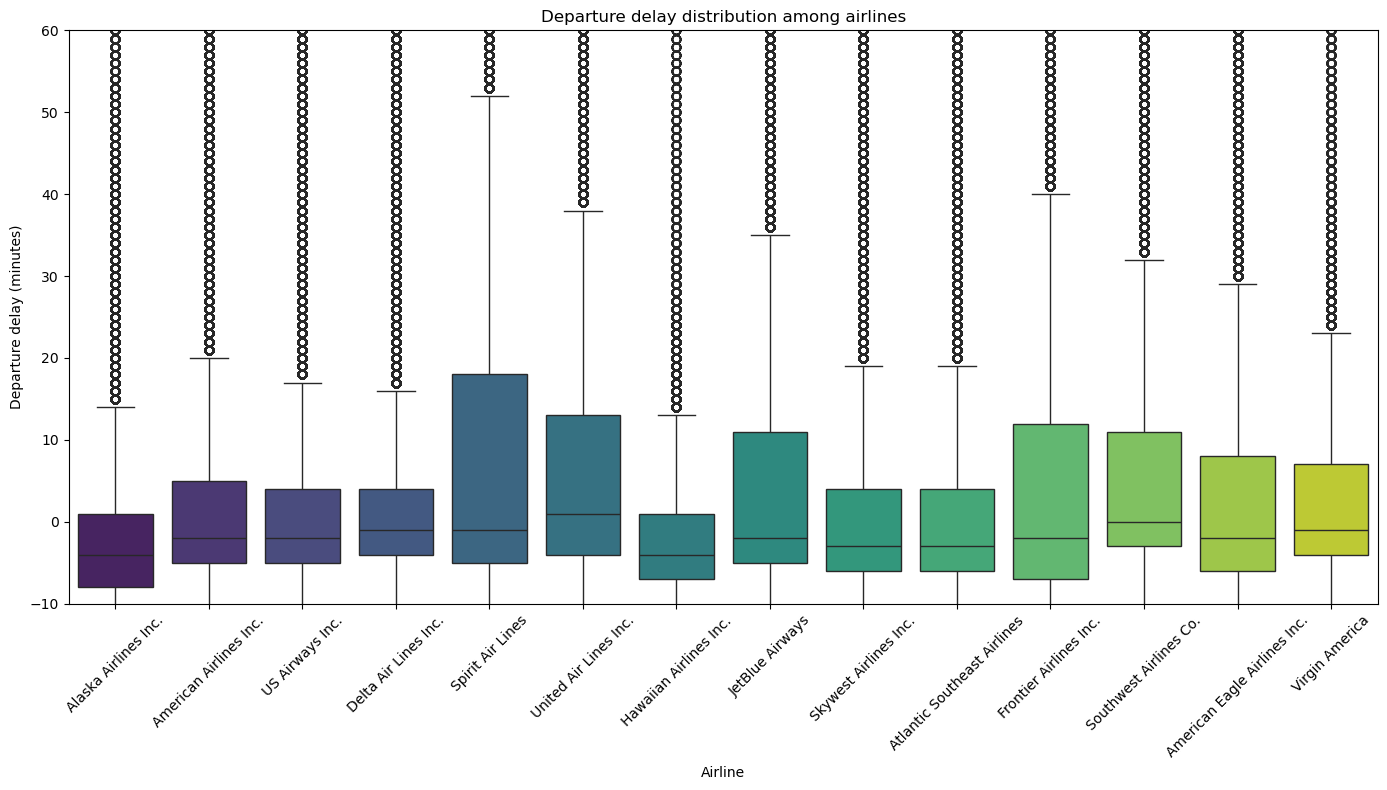

In [78]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=flights, x='AIRLINE_NAME', y='DEPARTURE_DELAY', palette='viridis', hue='AIRLINE_NAME')
plt.title('Departure delay distribution among airlines')
plt.xlabel('Airline')
plt.ylabel('Departure delay (minutes)')
plt.xticks(rotation=45)
plt.ylim(-10, 60)
plt.tight_layout()
plt.show()

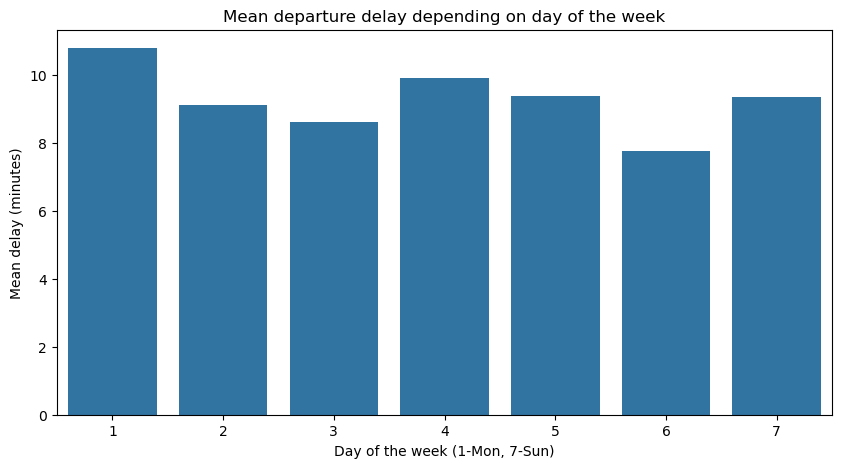

In [102]:
plt.figure(figsize=(10, 5))
sns.barplot(data=flights, x='DAY_OF_WEEK', y='DEPARTURE_DELAY', estimator=pd.Series.mean, errorbar=None)
plt.title('Mean departure delay depending on day of the week')
plt.xlabel('Day of the week (1-Mon, 7-Sun)')
plt.ylabel('Mean delay (minutes)')
plt.show()

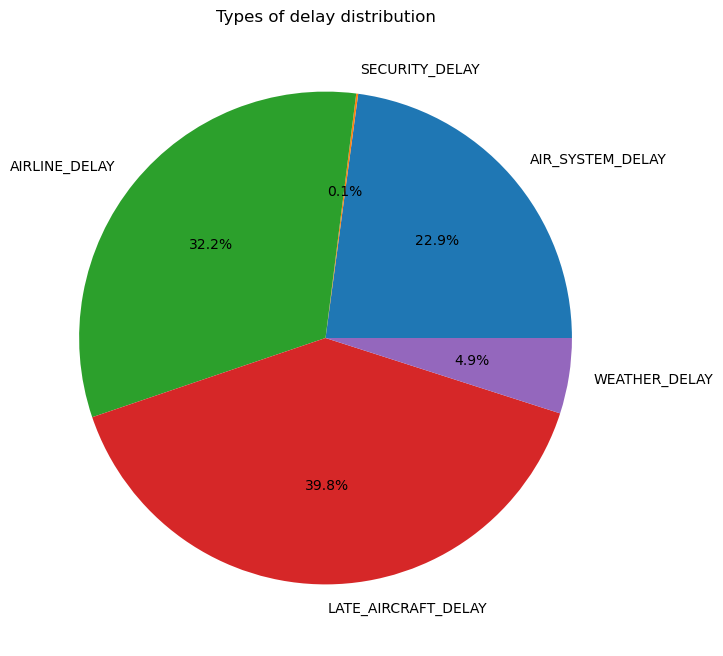

In [88]:
delay_types = flights[delay_columns].sum()
plt.figure(figsize=(8, 8))
plt.pie(delay_types, labels=delay_types.index, autopct='%1.1f%%')
plt.title('Types of delay distribution')
plt.show()

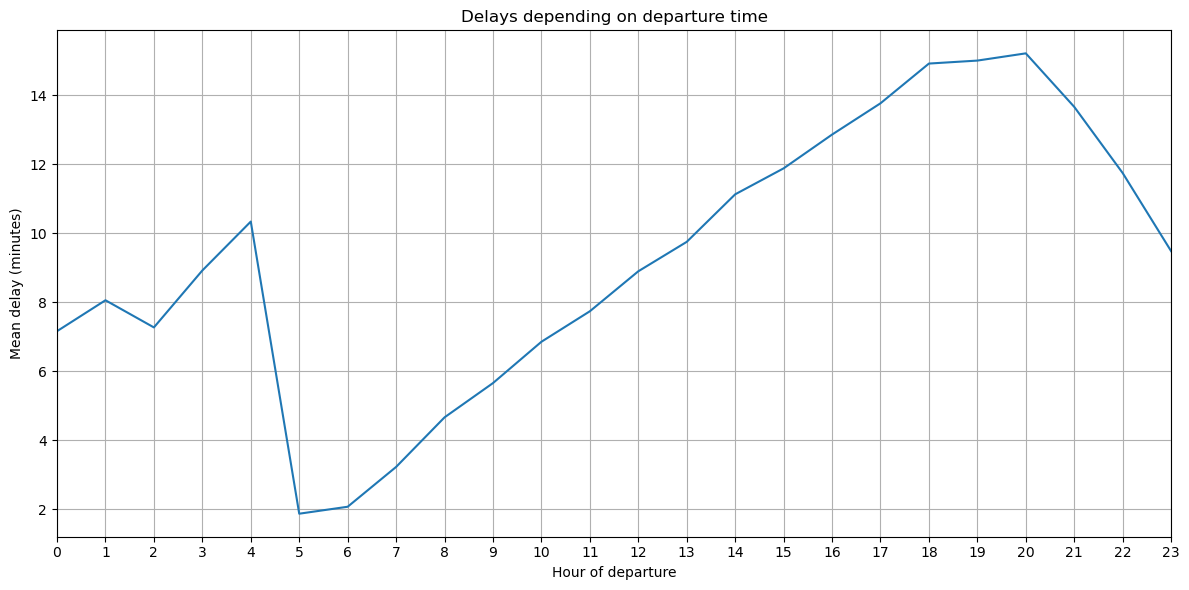

In [96]:
flights['SCHEDULED_DEPARTURE_HOUR'] = flights['SCHEDULED_DEPARTURE'] // 100
plt.figure(figsize=(12, 6))
sns.lineplot(data=flights, x='SCHEDULED_DEPARTURE_HOUR', y='DEPARTURE_DELAY', errorbar=None)
plt.title('Delays depending on departure time')
plt.xlabel('Hour of departure')
plt.ylabel('Mean delay (minutes)')
plt.xticks(range(0, 24))
plt.margins(x=0)
plt.tight_layout()
plt.grid(True)
plt.show()

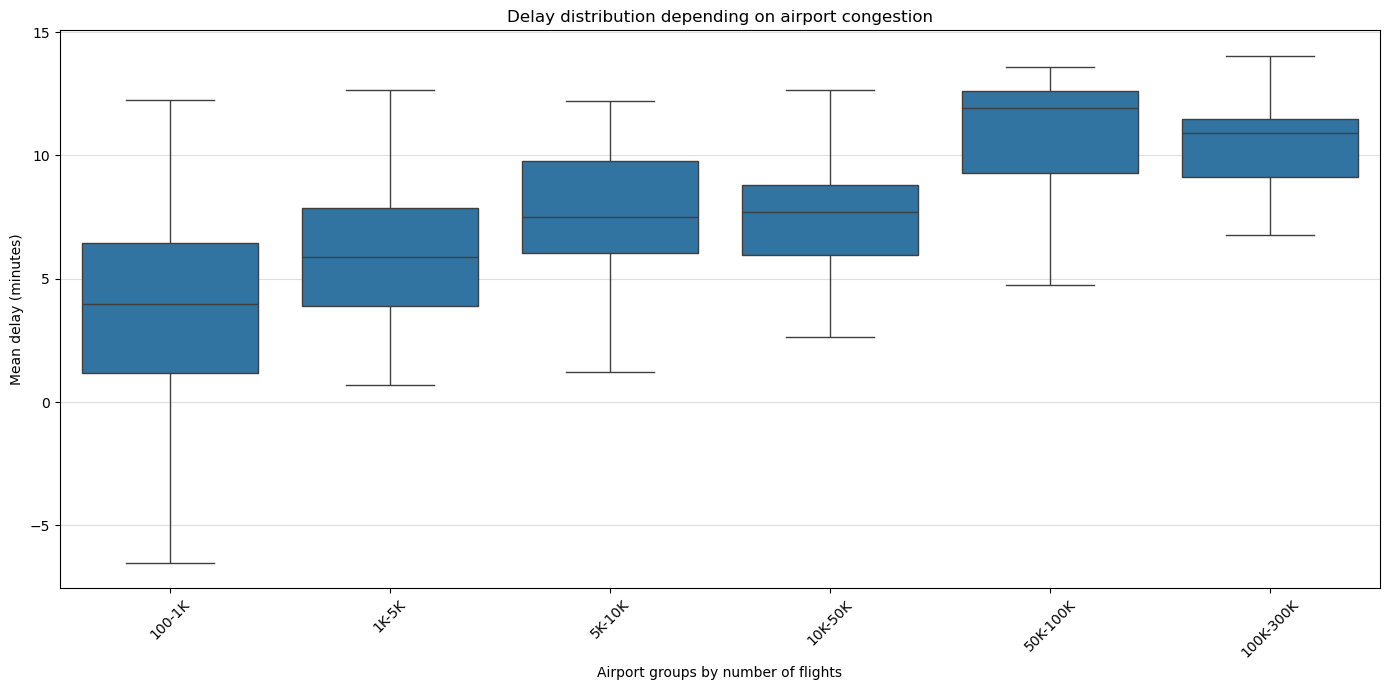

In [157]:
airport_stats['TRAFFIC_GROUP'] = pd.cut(airport_stats['TOTAL_FLIGHTS'], bins=[100, 1000, 5000, 10000, 50000, 100000, 300000], labels=['100-1K', '1K-5K', '5K-10K', '10K-50K', '50K-100K', '100K-300K'])

plt.figure(figsize=(14, 7))
sns.boxplot(data=airport_stats, x='TRAFFIC_GROUP', y='MEAN_DELAY', showfliers=False)
plt.title('Delay distribution depending on airport congestion')
plt.xlabel('Airport groups by number of flights')
plt.ylabel('Mean delay (minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()

Что можно заметить, внимательно изучив представленные выше графики?

1) График задержек в зависимости от авиакомпании показал, что авиакомпании Spirit Airlines, United Air Lines Inc., Jetblue Airways и Frontier Airlines Inc. имеют больший разброс задержек по сравнению с остальными авиакомпаниями, которые демонстрирую более стабильные показатели.
* Неравномерность задержек у некоторых авиакомпаний указывает на проблемы логистике. Возможно, стоит пересмотреть систему планирования рейсов или провести техосмотр самолетов.


2) Несмотря на то, что среднее время задержек не сильно меняятся по дням недели, все-таки можно заметить, что среднее время задержки больше всего в понедельник и меньше всего в субботу.
* Поскольку наибольшее среднее время задержки рейса наблюдается в понедельник, но при этом составляет чуть больше 5 минут, то нельзя сказать, что происходит перегрузка инфраструктуры.
* Возможно все-так стоит рассмотреть перенос некоторых рейсов с понедельника на субботу. Но нужно учитывать, что рейсы, вылетающие в понедельник, необходимы людям именно в этот день (например, начало командировок совпадает с началом недели, и т.д.). Поэтому перед принятием этого решения, стоит провести дополнительный анализ.


3) Если мы рассмотрим круговую диаграмму распределения типов задержки, то заметим, что основная причина задержки - опоздание предыдщуего рейса. Что указывает на проблему каскадных задержек в системе.
* Есть смысл рассмотреть увеличение интервалов между перелетами одного и того же самолета. Или, например, можно посмотреть среднее время загрузки багажа или прохождения техосмотра самолетом. Вполне возможно, можно оптимизировать эти процессы, чтобы уменьшить время задержки.


4) График зависимости задержек от времени суток указывает на то, что пик приходится на 4 часа утра и 18-20 часов.
* Скорее всего перераспределив время вылета рейсов, перенеся их на другое время, мы получим больше гневных отзывов от посетителей аэропортов. Например, раннее время вылета важно для людей, отправляющихся в командировки. А верчернее время вылета, позвлоляет людям, купившим перелет на длительное время, не тратить ценное дневное время на перелет, а использовать его для просмотра достопримечательностей или работы в месте прилета.


5) Не смотря на то, что график распределения задержек в зависимости от загруженности аэропорта показывает, что среднее время задержки больше у крупных аэропортов, аэропорты с меньшей загруженностью имеют юольший разброс времени задержки.
* Можно заметить, что низкая частота рейсов усиливает влияние единичных инцидентов (например, погода, поломка самолета и т.д.). Возможно стоит подумать над резервными рейсами.
* У загруженных аэропортов возникает риск каскадных задержек из-за большего среднего времени задержки. Возможное решение аналогичну пункту 3.
  